We want to implement a normal distribution functions, then Gaussian elimination with partial pivoting. We also want a growth factor calculator and a matrix norm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

Functions to generate matrices :

In [2]:
def N(x): 
    #density function of Normal(mu, sigma) distribution
    temp=(x-mu)/sigma
    factor= -(temp*temp)/2
    quotient = sigma*math.sqrt(2*math.pi)
    y = math.exp(factor) /quotient
    return y

In [3]:
def g_mat(n): 
    #generate an nxn matrix with normally ditributed entries
    mat=[]
    for i in range(n):
        row=[]
        for j in range(n):
            x=random.random() #this is in [0,1)
            y=40*N(x) #I take transform into [0,2)
            row.append(y)
        mat.append(row)
    return mat

In [4]:
def g_A(n):
    #initialises A tridiagonal nXn
    mat= [[0 for i in range(n)] for j in range(n)] #initialising
    for i in range(n):
        for j in range(n):
            if j ==i :
                mat[i][j]=i+1
            if abs(i-j)== 1:
                mat[i][j]=1
    return mat

In [5]:
def g_b(n):
    temp=[1 for i in range(n)]
    return temp

In [6]:
def g_guess(n):
    guess=[]
    for i in range(n):
        temp=random.random()+1
        guess.append(temp)
    return guess

Functions to perform Gaussian Elimination with Partial Pivoting :

In [7]:
def findpivot(array):
    #finds maximum element (in absolute value) of an array 
    p=0
    for i in range(len(array)):
        temp=abs(array[i])
        if temp>abs(array[p]):
            p=i      
    return p

In [8]:
def pivot(mat,k,p):
    #switch the kth column of mat with the pth column
    temp=mat[k]
    mat[k]=mat[p+k]
    mat[p+k]=temp#print ("k is ",k, " and Im switching row k : ", temp ," with row ",p+k," : ", mat[k])
    return mat

In [9]:
def annihilate (mat,k):
    #performs elimination on colomn k
    temp=mat#print ("Here k is still ", k)
    for i in range(len(mat)-k-1):
        factor= mat[i+k+1][k]/mat[k][k] #find fkj#print("We look for the column factor : ki = ", factor)
        for j in range(len(mat)-k):
            temp[i+k+1][j+k]+=-mat[k][j+k]*factor #print("We perform GE on mat(i,j) = mat(",i+1,",",j+k,") = ", temp[i+k+1][j+k])#print ("Hence the matrix is now ",temp)    #print ("-------")
    return temp

In [10]:
def GE(mat):
    #performs Gaussian Elimination on mat
    n=len(mat)
    temp=mat
    for k in range(n-1):
        array=[]
        for m in range(n-k):
            array.append(temp[m+k][k])
        p=findpivot(array)#find pivot i
        temp=pivot(temp,k ,p)#switch rows i and 1  #print("So now the matrix is : ", mat)
        temp=annihilate(temp,k)#annihilate column k
    return temp

Function that compute the growth factor :

In [11]:
def growth (A):
    #computes the growth factor of 2 nxn matrices A and B
    a=matrix_norm(A)
    U=GE(A) #performs Gaussian elimination with partial pivoting on A
    u=matrix_norm(U)
    growth=u/a
    return growth

Counters :

In [12]:
def interval(g_list, inter):
    #this computes max, min, subinterval number and length, given an array
    ma=max(g_list)
    mi=min(g_list)
    tot=ma-mi
    length=(ma-mi)/inter
    return ([ma, mi, tot, length])

In [13]:
def subcount(g_list, inter, arr):
    #this function counts the number of points of g_list within each intervals given by arr
    count=[]
    emptyness=[]
    for j in range(inter):
        l=arr[1]+j*arr[3] #computes lower and upper bound of each subinterval
        u=arr[1]+(j+1)*arr[3]#print("In the ",j+1,"th subinterval we look for g between ",l," and ",u,)
        c=0#initalising
        e=1 
        for k in range(len(g_list)):
            test=g_list[k]
            if test>=l: #if the prospect is in the interval
                if test <= u:
                    c+=1 #count it
                    e=0 #else mark this interval empty
        count.append(c)
        emptyness.append(e)#print("This is the tally : ", count)#print("This is the empty bool array :", emptyness)
    return [count, emptyness]

In [14]:
def refine_up(tally, info): 
    #given a tally list, this refines the upper bound in info
    update_R=1 #boolean
    for i in range(len(tally[1])):
        if update_R : #if we havent found the uper bound yet
            if tally[1][i] : #if this subinterval is empty
                r=i#print ("the ",r+1,"th interval is empty")
                if r >0: #I did not want to deal with range)(0)=0 and for loops not working there
                    Rs=0#initialising
                    Ls=0
                    #those count where the mass is
                    for j in range(r):#print ("Adding the point in the ",j+1, "th interval ; that's", tally[0][j],"points.")
                        Rs+=tally[0][j] 
                    for j in range(inter-r-1):#print ("Adding the point in the ",j+r+1, "th interval; that's", tally[0][j+r+1],"points.")
                        Ls+=tally[0][j+r+1]#print ("There are ", Rs,"points on the right and ", Ls, " on the left")
                    if Rs>Ls: #if the mass is before, we get rif of what after
                        info[0]= info[1]+r*info[3]#print("So we update the max to ", info[0])
                        update_R=0
    return info[0]

In [15]:
def refine_down(tally, info):
    update_L=1
    for i in range(len(tally[1])):
        if update_L :#print("We're looking for a new sharp lower bound")
            if tally[1][len(tally[1])-i-1] :
                r=len(tally[1])-i-1#print ("the ",r+1,"th interval is empty")
                if r >0:
                    Rs=0
                    Ls=0
                    for j in range(r):#print ("Adding the point in the ",j+1, "th interval ; that's", tally[0][j],"points.")
                        Rs+=tally[0][j]
                    for j in range(inter-r-1):#print ("Adding the point in the ",j+r+1, "th interval; that's", tally[0][j+r+1],"points.")
                        Ls+=tally[0][j+r+1]#print ("There are ", Rs,"points on the right and ", Ls, " on the left")
                    if Ls>Rs :
                        info[1]=info[1]+(r+1)*info[3]#print("So we update the min to ", info[1])
                        update_L=0
    return info[1]

In [16]:
def counter(g_list, inter):
    #given a dataset and a number of intervals, creates histogram-friendly array
    
    info=interval(g_list, inter)#print ("the upper value is : ", info[0]," and the lower value is : ",info[1]," so the interval has total length ", info[2], " and the subintervals have length ", info[3])
    tally=subcount(g_list, inter, info)#print("-----")
    
    while(sumlist(tally[1])>1) :#for h in range(3):#print("This is the count :",tally[0])
        info[0]=refine_up(tally, info)
        info[1]=refine_down(tally, info)
        #update length and sublengths                
        info[2]=info[0]-info[1]
        info[3]=info[2]/inter#print("this is the info array now :", info)#print ("the upper value is : ", info[0]," and the lower value is : ",info[1]," so the interval has total length ", info[2], " and the subintervals have length ", info[3])
        #count again!
        tally=subcount(g_list,inter,info)
    
    #now I have to truncate the original g_list to feed it to the histogram plotter
    truncated=[]
    for i in range(len(g_list)):
        test=g_list[i]
        if test>=info[1]: #if the prospect is in the final interval
                if test <= info[0]:
                    truncated.append(test)

    return [truncated, info]


Iterative Methods :
(Note that these return error norms)

In [17]:
def steepest(A,b):
    #performs steepest descent n times
    #return x and array of residuals
    r_list=[] 
    x=np.array(g_guess(len(b)))
    
    for i in range(len(b)):
        r=b-np.dot(A,x)
        r_list.append(r)
        r_t=np.transpose(r)
        temp=np.dot(r_t,r)
        den=np.dot(r_t,np.dot(A,r))
        a=temp/den
        x=x+a*r

    r=b-np.dot(A,x)
    r_list.append(r)
    return [x,r_list]

In [18]:
def CG(A,b):
    x_list=[]
    x=np.array(g_guess(len(b)))
    x_list.append(x)
    r_list=[]
    r=b-np.dot(A,x)
    r_list.append(r)
    p=r
    for i in range(len(b)+1):
        r_t=np.transpose(r)
        p_t=np.transpose(p)
        
        rr=np.dot(r_t,r)
        pAp=np.dot(p_t,np.dot(A,p))
        
        a=rr/pAp
        x=x+a*p
        x_list.append(x)
        r=r-a*np.dot(A,p)
        r_t=np.transpose(r)
        r_list.append(r)
        
        b=np.dot(r_t,r)/rr
        p=r+b*p
    return [x_list,r_list]

Norms :

In [19]:
def matrix_norm(mat):
    #computes the L_{\infty} norm of an nxn matrix
    n=len(mat)
    norm=0
    for i in range(n):
        for j in range(n):
            temp=abs(mat[i][j])
            if temp>norm:
                norm=temp
    return norm

In [20]:
def sumlist (array):
    #sums up elements in an array, I could have made this more versatile I admit
    somme=0
    for i in range(len(array)):
        somme+=abs(array[i])
    return somme

In [21]:
def L2_norm(vector):
    n=len(vector)
    norm=0
    for i in range(n):
        temp=vector[i]*vector[i]
        norm+=temp
    norm=math.sqrt(norm)
    return norm

Graphing Helpers :

In [22]:
def logscale (array):
    n=len(array)
    new=[]
    for i in range(n):
        temp=math.log(array[i])
        new.append(temp)
    return new

Question 1, Part 4 :

In [ ]:
mu=0
sigma=1

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)

n_list=[10,50,100, 200, 400]
ite=20
g_list=[]

for n in n_list:
    somme=0
    for k in range(ite):
        A=g_mat(n) #generates an nxn matrix
        temp=growth(A) #computes its growth factor
        somme+=temp #adds the values
    g=somme/ite #computes average
    g_list.append(g)
print(g_list)
logscale(g_list)    

ax1.plot(n_list, g_list, label='log')
plt.legend()
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n')
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.show()

We see that the graph gives a line that goes roughly through (400,6), so since log g = a n, we have that 6 = 400a therefore a is approximately 3/2 10^(-2). This is much smaller than the worst case estimate.

Question 1, Part 5 :

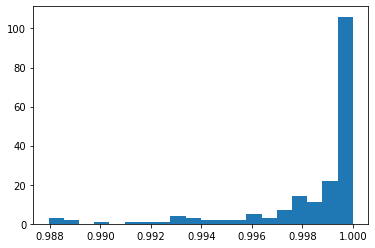

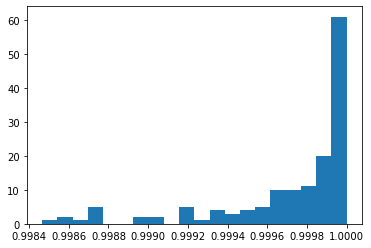

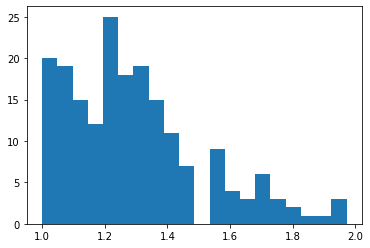

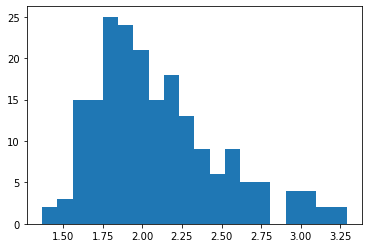

In [23]:
mu=0
sigma=1

#fig = plt.figure(figsize=(10,10))
#ax1 = fig.add_subplot(211)

n_list=[10,20,40, 80]
ite=200
inter=20

for n in n_list:
    g_list=[]
    for k in range(ite):
        A=g_mat(n) #generates an nxn matrix
        g=growth(A) #computes its growth factor
        g_list.append(g)
    
    result=counter(g_list, inter)
    #print(result)
    plt.hist(result[0], inter)
    plt.show()

It looks like the distribution is deviating from 1 slightly as the matrix size increases, and it's spreading. This makes sense because we have more data so larger chance of being away from the mean. I feel like this also depends on where I'm taking my a_ii values for the matrix A. I chose them randomly between 2*(0,1], which may be putting a constraint on my results.

Question 2 :

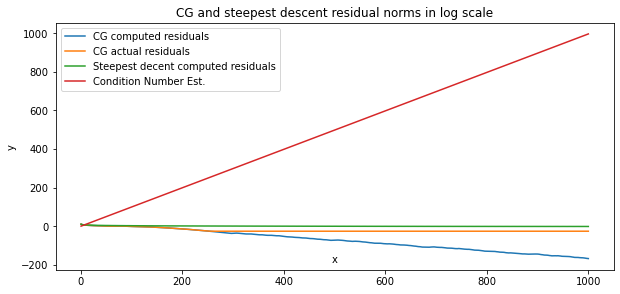

In [24]:
n=1000
A=np.array(g_A(n))
kappa=np.linalg.cond(A)
b=np.array(g_b(n))
b_t=np.transpose(b)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)

st=steepest(A,b_t)
cg=CG(A, b_t)

n_list=[]
cg_rlist=[]
cg_alist=[]
st_rlist=[]
est_list=[]

for i in range(len(b_t)):
    n_list.append(i+1)
    
    cg_r=L2_norm(cg[1][i])
    cg_rlist.append(cg_r)
    
    cg_a=b-np.dot(A, cg[0][i])
    cg_a=L2_norm(cg_a)
    cg_alist.append(cg_a)
    
    st_r=L2_norm(st[1][i])
    st_rlist.append(st_r)
    
    temp=math.log(2*math.sqrt(kappa)-1)
    den=math.log(2*math.sqrt(kappa)+1)
    est=i*temp/den
    est_list.append(est)
    
ax1.plot(n_list,logscale(cg_rlist),label='CG computed residuals') 
ax1.plot(n_list,logscale(cg_alist),label='CG actual residuals') 
ax1.plot(n_list,logscale(st_rlist),label='Steepest decent computed residuals') 
ax1.plot(n_list,est_list,label='Condition Number Est.') 

    
    
ax1.set_title(r'CG and steepest descent residual norms in log scale')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")


Comment : Obviously since the condition number estimate (red line) is proportional to i in log scale, then that grows linearly. We can see that for very large n, the norm of the computed residuals are much smaller than the actual residual (since negative in log scale means the actual data is less that 0). Overall the CG data looks to be much better than what we get from steepest decent.